In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import random
# load data set

df = pd.read_csv('dataset_NDoE_main_new.csv',sep=',',header=None)
data = df.values

# split into inputs and outputs
X_input = data[:, :6]
y_input_raw = data[:,6: ]


In [2]:
X_input[:,2]

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,  5

In [109]:

df_high = df[df.iloc[:,2] == 16]
data_high = df_high.values
X_input = data_high[:, :6]
y_input = data_high[:,6: ]


In [64]:
y_input_pca.shape

(917, 6)

In [8]:
merged_pca_max_velo= np.column_stack((X_input[:,:], y_input_pca))                             
#merged_pca_max_velo= np.column_stack((X_input[:,2], y_input_pca))                             

In [ ]:
pca_maxV[20:40,:6]

In [7]:
merged_pca_max_velo.shape

(917, 12)

In [9]:
pca_maxV =merged_pca_max_velo[merged_pca_max_velo[:, 2] == 16]

In [ ]:
pca_maxV[177]

In [10]:
#remove first element again
y_pca_maxV = pca_maxV[:,6:]

In [11]:
y_pca_maxV.shape

(186, 6)

# deal with the wrong data

### delete the wrong data

In [2]:
#find the wrong data

ysum = y_input_raw[:,0]+y_input_raw[:,1]
wrongdata = np.argwhere(ysum > 0.5).reshape(1,-1)

z = np.sum(y_input_raw, axis=1)
wrongdata1 = np.argwhere(z < 2).reshape(1,-1)

wrongdata_total = np.append(wrongdata,wrongdata1)

#delete the wrong data
y_input_original = y_input_raw
X_input_original = X_input
y_input = np.delete(y_input_raw, wrongdata_total, 0)
X_input = np.delete(X_input, wrongdata_total, 0)
print(y_input.shape,X_input.shape)

# split the data set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_input, test_size=0.3, 
    #random_state=0 #original one
    random_state=2
)

(917, 120) (917, 6)


In [4]:
print(y_input_original.shape,X_input_original.shape)

(960, 120) (960, 6)


In [ ]:
y_test.shape

### plot wrong data statistics 

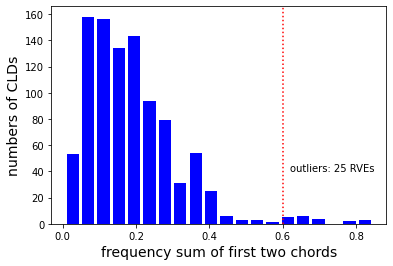

In [137]:
plt.hist(data[:,6]+data[:,7], bins=20,histtype = 'bar', align = 'mid',rwidth = 0.8,color='b')
plt.axvline(x=0.6,c='r',ls=':')
plt.text(0.62,40,'outliers: %d RVEs'%wrongdata.shape[1])
plt.xlabel('frequency sum of first two chords', fontsize=14)
plt.ylabel('numbers of CLDs', fontsize=14)
plt.savefig("Wrong CLD statistics1.png")

### plot wrong data statistics 2

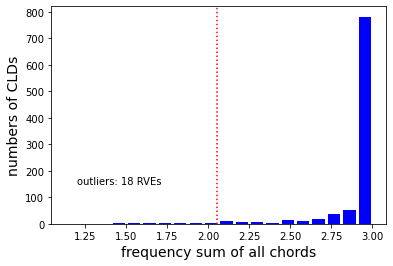

In [136]:
plt.hist(z, bins=20,histtype = 'bar', align = 'mid',rwidth = 0.8, color='b')
plt.axvline(x=2.05,c='r',ls=':')
plt.text(1.2,150,'outliers: %d RVEs'%wrongdata1.shape[1])
plt.xlabel('frequency sum of all chords', fontsize=14)
plt.ylabel('numbers of CLDs', fontsize=14)
plt.savefig("Wrong CLD statistics2.png")

### plot some wrong CLD

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 4), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']

for i in range(3):
    c=random.choice(wrongdata1.reshape(-1,1))
    #c=[514,865,525]
    
    for j in range(3):
        structurenumber='the %dth microstructure'%c
        axs[i].plot(range(40),data[c,6: ].reshape(3,40)[j,:40]
                    ,label=strlabel[j]
                   )
        axs[i].legend(loc = 'upper right',prop={'size': 14})
        axs[i].legend(loc = 'upper right',prop={'size': 14})
        axs[i].set_ylabel('Frequency',fontsize=14)
        axs[i].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i].title.set_text(structurenumber.format(c,z[c]))
        axs[i].text(0.5,0.6,'The total sum of all chords=%.3f'%(np.around(z[c],3)),fontsize=12,
                    horizontalalignment='center', verticalalignment='center', transform= axs[i].transAxes)

#plt.legend(loc = 'upper right',prop={'size': 14})

# plot CLD with corrosponding process parameters

In [ ]:
# rotation angle

c = [0,320,480,719]
#c = [719,768,910,958]
n = [0,30,60,90]
strlabel = ['x','y','z']
#fignow = plt.figure(figsize=(12,3))
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):
    
    for j in range(2):
        #z=z+1
        structurenumber='Rotation angle: %d°'%(n[z])
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d]
                         )
            
        #plt.plot(range(120),y_input[c[z],:],label=structurenumber)
        axs[i,j].legend(loc = 'upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.05, 0.25, structurenumber,transform=axs[i,j].transAxes,
               fontsize=14, verticalalignment='top')
        z=z+1
plt.savefig("representative CLD1.png")

In [ ]:
y_input_original[c[3],:].shape

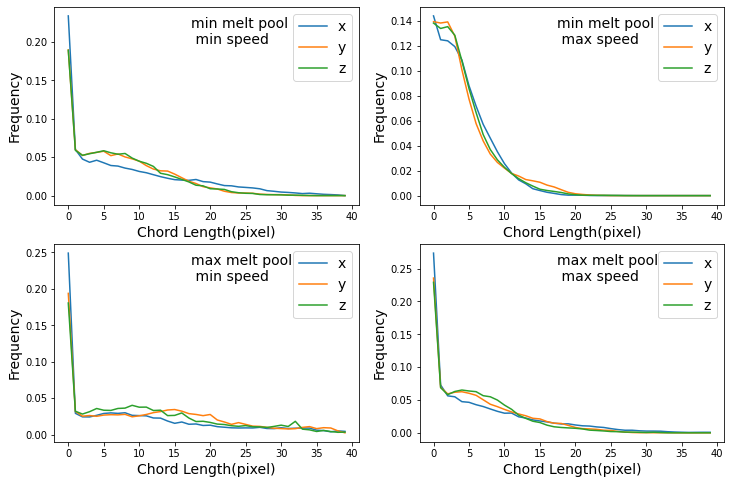

In [53]:
# melt pool size and speed

c = [719,768,920,958]
n = [0,30,60,90]
strlabel = ['x','y','z']
structurenumber =['min melt pool \n min speed','min melt pool \n max speed','max melt pool \n min speed','max melt pool \n max speed']
#fignow = plt.figure(figsize=(12,3))
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):
    
    for j in range(2):
        #z=z+1
        
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d]
                         )
            
        #plt.plot(range(120),y_input[c[z],:],label=structurenumber)
        axs[i,j].legend(loc = 'upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.45, 0.95, structurenumber[z],transform=axs[i,j].transAxes,
               fontsize=14, verticalalignment='top')
        z=z+1
plt.savefig("representative CLD2.png")

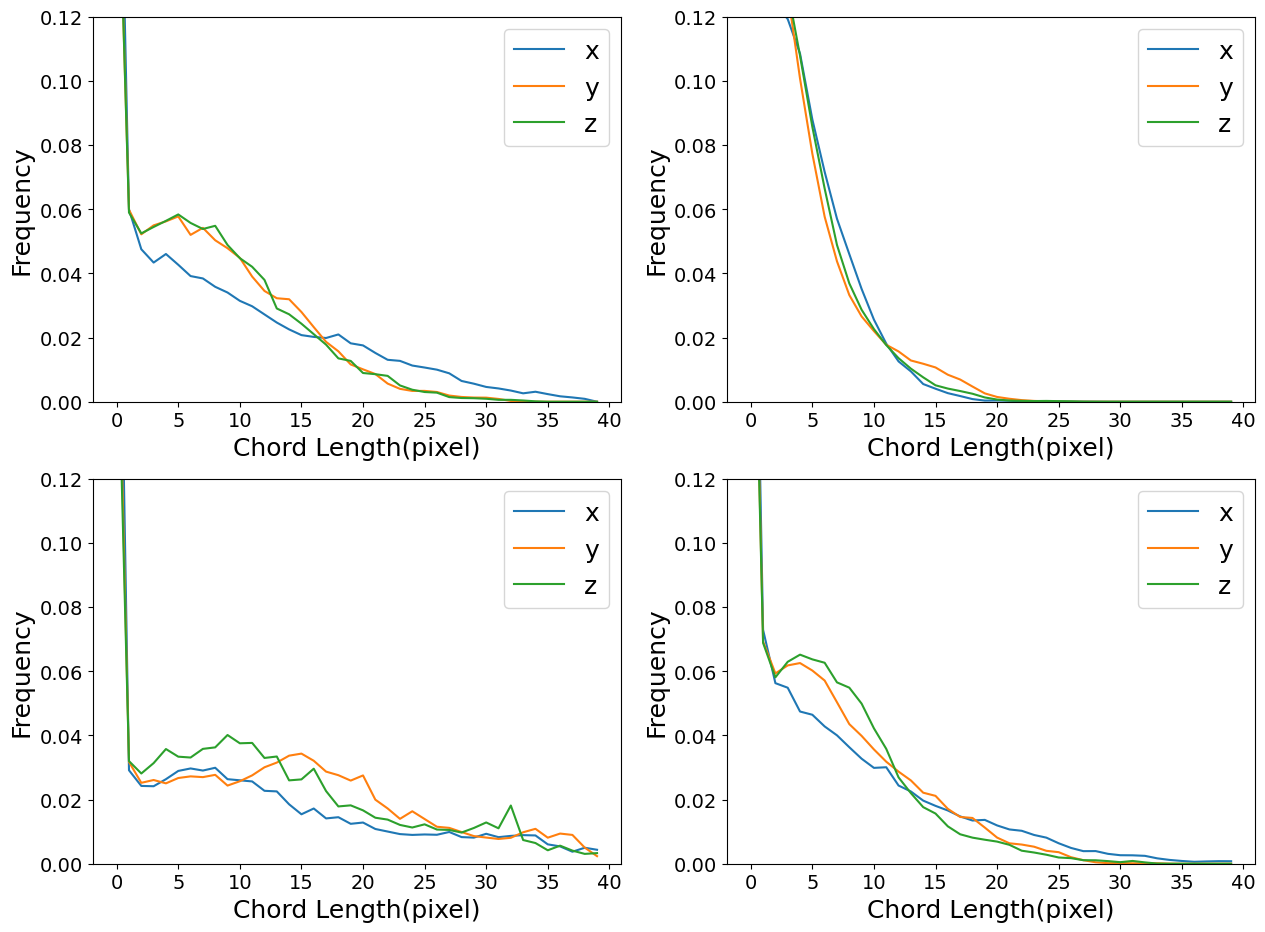

In [5]:
# melt pool size and speed

c = [719,768,920,958]
n = [0,30,60,90]
strlabel = ['x','y','z']
structurenumber =['min melt pool \n min speed','min melt pool \n max speed','max melt pool \n min speed','max melt pool \n max speed']
#fignow = plt.figure(figsize=(12,3))
fig, axs = plt.subplots(2,2, figsize=(15, 11), facecolor=None, edgecolor='k')
z=0
for i in range(2):
    
    for j in range(2):
        #z=z+1
        
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d]
                         )
            
        #plt.plot(range(120),y_input[c[z],:],label=structurenumber)
        axs[i,j].legend(loc = 'upper right',prop={'size': 18})
        axs[i,j].set_ylabel('Frequency',fontsize=18)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=18)
        axs[i,j].tick_params(axis='both', labelsize=14)
        #axs[i,j].grid()
        axs[i,j].set_ylim(0,0.12)
        z=z+1
plt.savefig("representative CLD2_formatted.png")

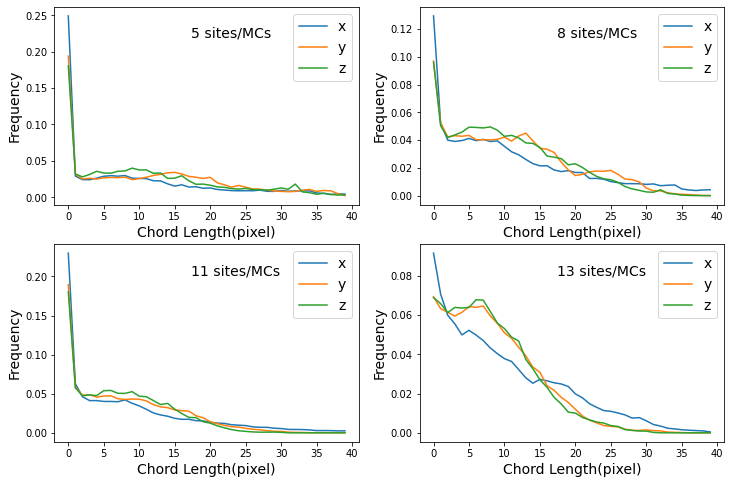

In [55]:
# scanning speed

c = [920,932,944,957]

strlabel = ['x','y','z']
structurenumber =['5 sites/MCs','8 sites/MCs','11 sites/MCs','13 sites/MCs']
#fignow = plt.figure(figsize=(12,3))
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):
    
    for j in range(2):
        #z=z+1
        
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d]
                         )
            
        #plt.plot(range(120),y_input[c[z],:],label=structurenumber)
        axs[i,j].legend(loc = 'upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.45, 0.9, structurenumber[z],transform=axs[i,j].transAxes,
               fontsize=14, verticalalignment='top')
        z=z+1
plt.savefig("CLD-speed.png")

ValueError: cannot reshape array of size 6 into shape (3,40)

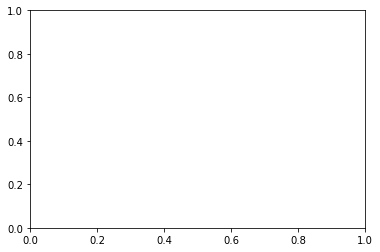

In [65]:
# check if wrong data was reduced from y_input
#ATTENTION: change to y_input_raw
#minMeltpoolmaxVelo y_input[740]
#maxMeltpoolminVelo y_input[868]

c=285
strlabel = ['x','y','z']
#=[36,82,103]
colors = ['black','red', 'blue']
ax = plt.gca()    
for i in range(3):
  structurenumber='the %dth microstructure'%c
  plt.plot(range(40),y_input_pca[c,:6].reshape(3,40)[i,:40]
                      ,label=strlabel[i], color=colors[i]
                    )
  plt.legend(loc = 'upper right',prop={'size': 14})
  plt.ylabel('frequency',fontsize=14)
  plt.xlabel('chord Length in px',fontsize=14)
          #axs.title.set_text(structurenumber.format(c,z[c]))
    #plt.text(0.5,0.6,'The total sum of all chords=%.3f'%(np.around(z[c],3)),fontsize=12,
    #                 horizontalalignment='center', verticalalignment='center', transform= axs.transAxes)
ax.set_xlim([0,40])
ax.set_yticks(np.arange(0,0.3,0.05))
ax.set_ylim([0, 0.2])


In [66]:
y_input_raw.shape

(960, 120)

(0.0, 0.2)

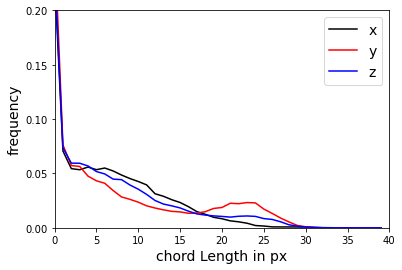

In [126]:
# check if wrong data was reduced from y_input
#example: y_Vmax[50]=y_input_pca[285]=y_raw[290]


c=779
strlabel = ['x','y','z']
#=[36,82,103]
colors = ['black','red', 'blue']
ax = plt.gca()    
for i in range(3):
  structurenumber='the %dth microstructure'%c
  plt.plot(range(40),y_input_raw[c,: ].reshape(3,40)[i,:40]
                      ,label=strlabel[i], color=colors[i]
                    )
  plt.legend(loc = 'upper right',prop={'size': 14})
  plt.ylabel('frequency',fontsize=14)
  plt.xlabel('chord Length in px',fontsize=14)
          #axs.title.set_text(structurenumber.format(c,z[c]))
    #plt.text(0.5,0.6,'The total sum of all chords=%.3f'%(np.around(z[c],3)),fontsize=12,
    #                 horizontalalignment='center', verticalalignment='center', transform= axs.transAxes)
ax.set_xlim([0,40])
ax.set_yticks(np.arange(0,0.3,0.05))
ax.set_ylim([0, 0.2])


In [20]:
y_pca_maxV

array([[ 0.12833023, -0.20917435,  0.12343667,  0.03895197,  0.02776332,
        -0.00752711],
       [-0.02576759, -0.11676677,  0.01089034,  0.06503331, -0.01420168,
         0.02655349],
       [ 0.1424291 , -0.20832263,  0.1230562 ,  0.03240774,  0.02969492,
        -0.01198279],
       ...,
       [-0.05805549, -0.05094234, -0.03558671, -0.02819043,  0.03267503,
        -0.00337901],
       [ 0.2369495 ,  0.00579805, -0.02401892, -0.0272257 ,  0.01538314,
         0.01010882],
       [ 0.05660015, -0.00512456, -0.03852982, -0.02555464,  0.02599274,
         0.00722196]])

In [20]:
x = y_input_raw[c,: ].reshape(3,40)[0,:40]
print(x)

[0.21627688 0.02820183 0.02253063 0.02316457 0.02845884 0.03185128
 0.02974385 0.03241669 0.03257089 0.03186841 0.03279363 0.03123447
 0.02881864 0.02964105 0.02729375 0.02994946 0.02325024 0.0231817
 0.0183329  0.01932665 0.01697935 0.01721922 0.01845284 0.01826437
 0.0232845  0.01814444 0.01257603 0.01156515 0.00842971 0.0078643
 0.00813844 0.00897798 0.0080185  0.00699049 0.00926925 0.00642508
 0.0075559  0.00899512 0.0051058  0.00419772]


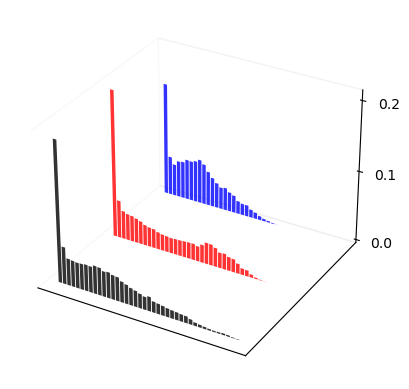

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


dades01 = y_input_raw[c,: ].reshape(3,40)[0,:40]
dades02 = y_input_raw[c,: ].reshape(3,40)[1,:40]
dades03 = y_input_raw[c,: ].reshape(3,40)[2,:40]

#df_3d = y_input_raw[c,: ].reshape(3,40)[i,:40]
df_3d = pd.DataFrame([dades01, dades02, dades03]).transpose()
colors = ['black','red','blue','y','b','p']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z= list(df_3d)
for n, i in enumerate(df_3d):
    xs = np.arange(len(df_3d[i]))
    ys = [i for i in df_3d[i]]
    zs = z[n]

    cs = colors[n]
    
    ax.bar(xs, ys, zs, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('chords')
#ax.set_ylabel('Y')
ax.set_zlabel('frequency')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks(np.arange(0,0.3, step= 0.1))
ax.yaxis.grid(True, which='major')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
#ax.xaxis.pane.set_edgecolor('w')
ax.grid(False)
#plt.show()
plt.savefig('dist.png')

In [26]:
y_input.shape

(917, 120)

In [ ]:
X_input[539]

In [ ]:
pca_maxV[106,:6]

In [35]:
np.shape(y_pca_maxV)

(186, 6)

In [117]:
#calculate different state of reconstruction

num = 50
num_orig = 290
pc0 = pca.mean_
pc1 = pca.mean_+y_pca_maxV[num,1]*y_pca_PC[1,:]
pc2 = pca.mean_+y_pca_maxV[num,1]*y_pca_PC[1,:]+y_pca_maxV[num,2]*y_pca_PC[2,:]
pc3 = pca.mean_+y_pca_maxV[num,1]*y_pca_PC[1,:]+y_pca_maxV[num,2]*y_pca_PC[2,:]+y_pca_maxV[num,3]*y_pca_PC[3,:]
pc4 = pca.mean_+y_pca_maxV[num,1]*y_pca_PC[1,:]+y_pca_maxV[num,2]*y_pca_PC[2,:]+y_pca_maxV[num,3]*y_pca_PC[3,:]+y_pca_maxV[num,4]*y_pca_PC[4,:]
CLD = np.vstack((pc0, pc1, pc2, pc3, pc4,y_input_raw[num_orig,: ]))

Text(0.5, 1.0, 'original')

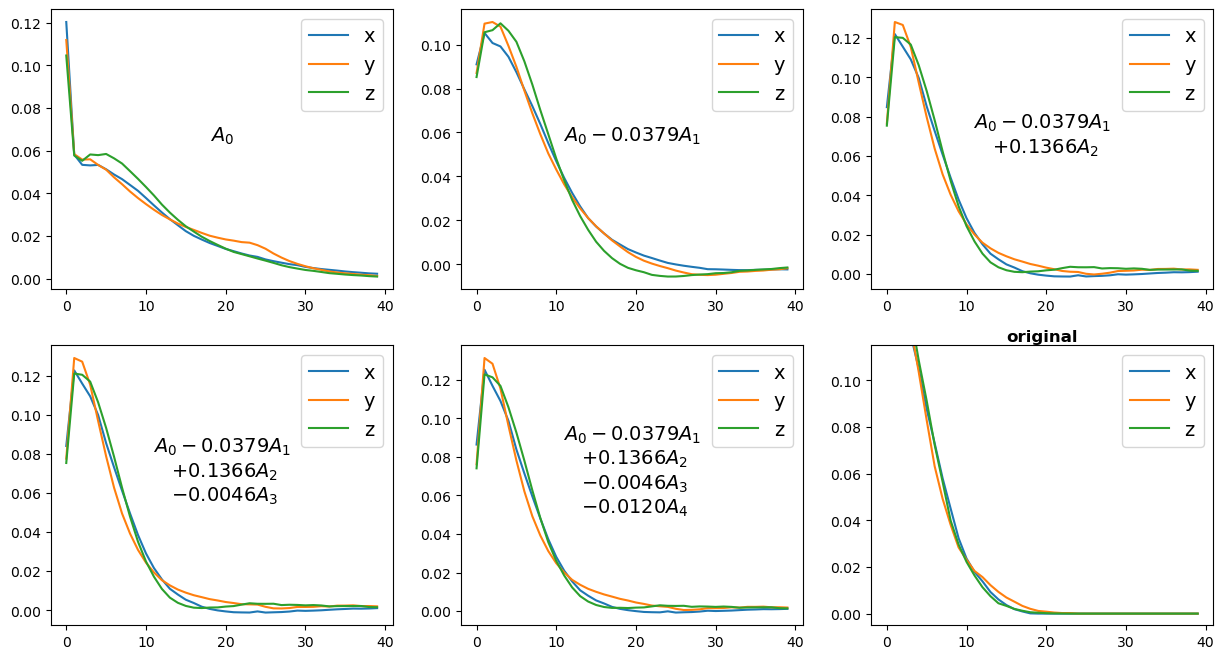

In [119]:
# plot different reconstrcution

z = pca.mean_
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
recon_text=['$A_0$',
            '$A_0 -0.0379 A_1$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$\n $-0.0120 A_4$',
            ''
           ]
z=0
for i in range(2):
    for k in range(3):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
        
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        #axs[i,k].set_ylabel('Change in Frequency',fontsize=14)
        #axs[i,k].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,k].text(0.5,0.55,recon_text[z],fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        z = z+1
        
axs[1,2].set_ylim([-0.005,0.115])
axs[1,2].set_title('original',verticalalignment='center',fontweight='heavy')
#axs[1,1].set_title('Reconstructed CLD' ,fontweight='heavy')
#plt.savefig("CLD reconstruction.png")  

In [21]:
X_input[741]

array([90., 30., 16., 25., 40., 10.])

In [23]:
costum_point = np.argwhere(X_input[:,0]==90)
costum_point_2 = np.argwhere(X_input[:,1]==60)
costum_point_3 = np.argwhere(X_input[:,2]==5)
costum_point_4 = np.argwhere(X_input[:,3]==35)
costum_point_5 = np.argwhere(X_input[:,4]==60)
costum_point_6 = np.argwhere(X_input[:,5]==10)
merged_point = [point for point in costum_point if point in costum_point_2 and 
                point in costum_point_3  and point in costum_point_4 and point in costum_point_5
               and point in costum_point_6]
print(merged_point)


[array([868], dtype=int64)]


In [27]:
X_input.shape

(917, 6)

In [56]:
y_input_raw.shape

(960, 120)

In [113]:
costum_point = np.argwhere(X_input[:,0]==0)
costum_point_2 = np.argwhere(X_input[:,1]==30)
costum_point_3 = np.argwhere(X_input[:,2]==16)
costum_point_4 = np.argwhere(X_input[:,3]==35)
costum_point_5 = np.argwhere(X_input[:,4]==60)
costum_point_6 = np.argwhere(X_input[:,5]==10)
merged_point = [point for point in costum_point if point in costum_point_2 and 
                point in costum_point_3  and point in costum_point_4 and point in costum_point_5
               and point in costum_point_6]
print(merged_point)


[array([59], dtype=int64)]


In [ ]:
y_train_pca.shape

In [127]:
#get index of microstructure from PC space plot

#y_input_pca[:number,0]
#y_input_pca.shape

# df_high = df[df[2] == 16]
# data_high = df_high.values
# X_input = data_high[:, :6]
# y_input = data_high[:,6: ]

#y_test_kernel_pca
max_PC1 = np.argmax(y_pca_maxV[:,0])
print(f"max PC1: {max_PC1}")

min_PC1 = np.argmin(y_pca_maxV[:,0])
print(f"min PC1: {min_PC1}")

max_PC2 = np.argmax(y_pca_maxV[:,1])
print(f"max PC2: {max_PC2}")

min_PC2 = np.argmin(y_pca_maxV[:,1])
print(f"min PC2: {min_PC2}")

min3_PC2 = []
min3_PC2.append(np.argsort(y_pca_maxV[:,1])[:3])

max3_PC1 = []
max3_PC1.append(np.argsort(y_pca_maxV[:,0])[-3:])

max3_PC2 = []
max3_PC2.append(np.argsort(y_pca_maxV[:,1])[-3:])

print(f"top3 min PC2: {min3_PC2}")
print(f"top3 max PC1: {max3_PC1}")
print(f"top3 max PC2: {max3_PC2}")
costum_point = np.argwhere(y_input_pca[:,0]>0.4)
costum_point_PC2 = np.argwhere(y_input_pca[:,1]>0)
merged_point = [point for point in costum_point if point in costum_point_PC2]
print(merged_point)

print(f"{X_input[59]}")
print(f"{X_input[951]}")
print(f"{X_input[288]}")
print(f"{X_input[290]}")
print(y_pca_maxV[11,:6],y_pca_maxV[106,:6],y_pca_maxV[177,:6],y_pca_maxV[48,:6])
print()
#y_train[36,:6]

#y_train[82,:6]

#y_train[103,:6]

max PC1: 106
min PC1: 177
max PC2: 106
min PC2: 48
top3 min PC2: [array([ 48,  50, 142], dtype=int64)]
top3 max PC1: [array([150, 105, 106], dtype=int64)]
top3 max PC2: [array([151,  11, 106], dtype=int64)]
[array([10], dtype=int64), array([70], dtype=int64), array([245], dtype=int64), array([305], dtype=int64), array([478], dtype=int64), array([502], dtype=int64), array([524], dtype=int64), array([525], dtype=int64), array([534], dtype=int64), array([704], dtype=int64), array([721], dtype=int64), array([726], dtype=int64), array([748], dtype=int64), array([759], dtype=int64), array([867], dtype=int64)]
[ 0. 30. 16. 35. 60. 10.]
[90. 60. 16. 25. 50. 10.]
[30. 30. 16. 25. 40.  5.]
[30. 30. 16. 25. 50.  5.]
[ 0.22641624  0.04141969 -0.02583166  0.09089191 -0.03183565  0.03389617] [ 0.56509067  0.12177273 -0.03334844 -0.00638638 -0.03122268 -0.01088345] [-0.09191061 -0.10858407 -0.03924689 -0.02563805 -0.01123317  0.0048557 ] [ 0.10663021 -0.22799044  0.11339011  0.00603185  0.00781869 -0

In [71]:
X_input.shape

(917, 6)

In [ ]:
pca_maxV[177,:6]

In [121]:
def find_rows(source, target):
    return np.where((source == target).all(axis=1))[0]

looking = pca_maxV[151,:6]

print(find_rows(source=X_input, target=looking)) # [1, 3]

[779]


In [118]:
def find_rows(source, target):
    return np.where((source == target).all(axis=1))[0]

looking = X_input[299,:6]

print(find_rows(source=pca_maxV[:,:6], target=looking)) # [1, 3]

[59]


In [59]:
pca_maxV.shape

(186, 12)

In [ ]:
looking

In [ ]:
X_train.shape

In [ ]:
y_input_pca.shape

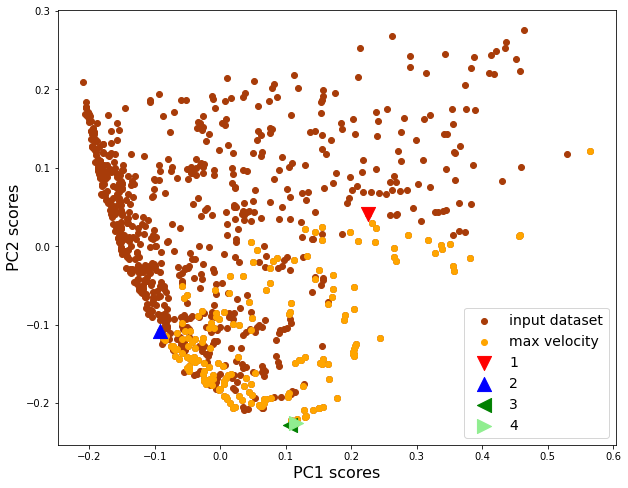

In [31]:
# plot the training data and test data

fig = plt.figure(figsize=(10,8))
ax = plt.gca()    
c = ax.scatter(y_input_pca[:,0], y_input_pca[:,1], c='#a83c09', marker='o',label='input dataset')
c = ax.scatter(y_pca_maxV[:,0], y_pca_maxV[:,1], c='orange', marker='o',label='max velocity')
#c = ax.scatter(y_input_pca[70,0], y_input_pca[70,1], c='yellow', marker='o',label='1',s=100)
#c = ax.scatter(y_input_pca[59,0], y_input_pca[59,1], c='red', marker='v',label='1',s=200)
c = ax.scatter(y_pca_maxV[11,0], y_pca_maxV[11,1], c='red', marker='v',label='1',s=200)
#c = ax.scatter(y_input_pca[69,0], y_input_pca[69,1], c='blue', marker='o',label='69',s=100)
c = ax.scatter(y_pca_maxV[177,0], y_pca_maxV[177,1], c='blue', marker='^',label='2',s=200)

#c = ax.scatter(y_input_pca[283,0], y_input_pca[283,1], c='green', marker='o',label='283',s=100)
c = ax.scatter(y_pca_maxV[48,0], y_pca_maxV[48,1], c='green', marker='<',label='3',s=200)
c = ax.scatter(y_pca_maxV[50,0], y_pca_maxV[50,1], c='lightgreen', marker='>',label='4',s=200)
#c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c='#868484',marker='x',label='training set')
#c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c='#a83c09',marker='o',label='test set')

ax.set_xlabel('PC1 scores',fontsize=16)
ax.set_ylabel('PC2 scores',fontsize=16)
#ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'lower right',prop={'size': 14})
#plt.title("Scatter plot of PC1 PC2 scores",fontsize=16)
#ax.view_init(45, 35)
#plt.colorbar(c)

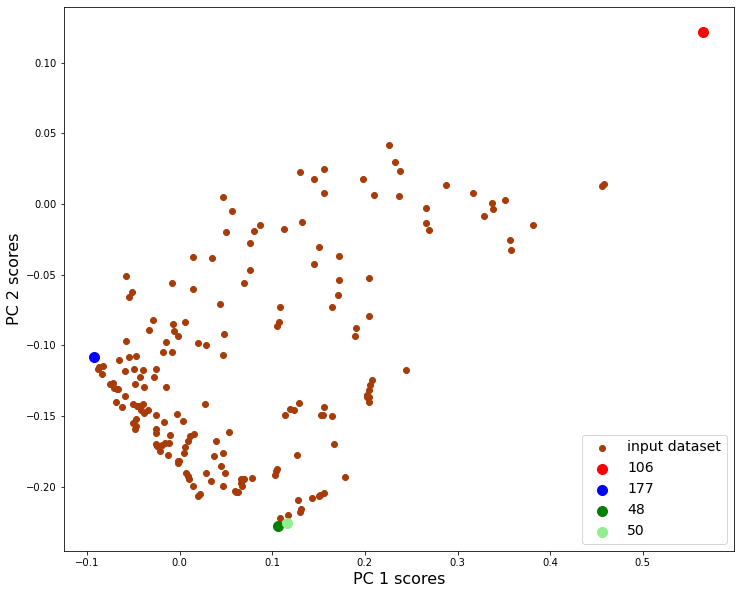

In [22]:

# plot the training data and test data

fig = plt.figure(figsize=(12,10))
ax = plt.gca()    
c = ax.scatter(y_pca_maxV[:,0], y_pca_maxV[:,1], c='#a83c09', marker='o',label='input dataset')
#c = ax.scatter(y_test[:,0], y_test[:,1], c='#a83c09', marker='o',label='test set')
c = ax.scatter(y_pca_maxV[106,0], y_pca_maxV[106,1], c='red', marker='o',label='106',s=100)
c = ax.scatter(y_pca_maxV[177,0], y_pca_maxV[177,1], c='blue', marker='o',label='177',s=100)
#c = ax.scatter(y_input_pca[70,0], y_input_pca[70,1], c='yellow', marker='o',label='70',s=100)
c = ax.scatter(y_pca_maxV[48,0], y_pca_maxV[48,1], c='green', marker='o',label='48',s=100)
c = ax.scatter(y_pca_maxV[50,0], y_pca_maxV[50,1], c='lightgreen', marker='o',label='50',s=100)
#c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c='#868484',marker='x',label='training set')
#c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c='#a83c09',marker='o',label='test set')

ax.set_xlabel('PC 1 scores',fontsize=16)
ax.set_ylabel('PC 2 scores',fontsize=16)
#ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'lower right',prop={'size': 14})
#plt.title("Scatter plot of PC1 PC2 scores",fontsize=16)
#ax.view_init(45, 35)
#plt.colorbar(c)

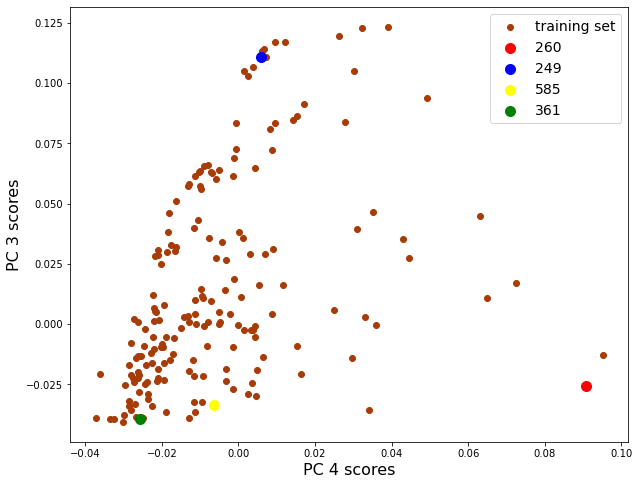

In [29]:
# plot the training data and test data

fig = plt.figure(figsize=(10,8))
ax = plt.gca()    
c = ax.scatter(y_pca_maxV[:,3], y_pca_maxV[:,2], c='#a83c09', marker='o',label='training set')
#c = ax.scatter(y_test[:,0], y_test[:,1], c='#a83c09', marker='o',label='test set')
c = ax.scatter(y_pca_maxV[11,3], y_pca_maxV[11,2], c='red', marker='o',label='260',s=100)
c = ax.scatter(y_pca_maxV[50,3], y_pca_maxV[50,2], c='blue', marker='o',label='249',s=100)
c = ax.scatter(y_pca_maxV[106,3], y_pca_maxV[106,2], c='yellow', marker='o',label='585',s=100)
c = ax.scatter(y_pca_maxV[177,3], y_pca_maxV[177,2], c='green', marker='o',label='361',s=100)
#c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c='#868484',marker='x',label='training set')
#c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c='#a83c09',marker='o',label='test set')

ax.set_xlabel('PC 4 scores',fontsize=16)
ax.set_ylabel('PC 3 scores',fontsize=16)
#ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'upper right',prop={'size': 14})
#plt.title("Scatter plot of PC1 PC2 scores",fontsize=16)
#ax.view_init(45, 35)
#plt.colorbar(c)

In [ ]:
!pip install seaborn

### t-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns


sns.set(rc={'figure.figsize':(11.7,8.27)})
# palette = sns.color_palette("bright", 10)

Y_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random').fit_transform(y_train)
print(Y_embedded.shape)
print(y_train.shape)

sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], hue = X_train[:, 0], legend='full')

In [ ]:
#3dims t-sne

sns.set(rc={'figure.figsize':(11.7,8.27)})
# palette = sns.color_palette("bright", 10)

Y_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random').fit_transform(y_train)
print(Y_embedded.shape)
print(y_train.shape)

sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], Y_embedded[:,2], hue = X_train[:, 0], legend='full')

### check the CLD 

In [ ]:
c = random.sample(range(y_input.shape[0]), k=3)
c.sort()
strlabel = ['x','y','z']
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
for i in range(3):
    structurenumber='the %dth microstructure'%(c[i]+2)
    for j in range(3):
        axs[0,i].plot(range(40),y_input[c[i],:].reshape(3,40)[j,:],
                      label=strlabel[j]
                     )
        axs[1,i].plot(range(120),y_input[c[i],:])
        axs[0,i].legend(loc = 'upper right',prop={'size': 14})
        axs[0,i].title.set_text(structurenumber)
#plt.savefig("representative CLD5.png")

### the probability distribution function $P_i = \frac{N_i l_i}{\sum^n_{i=1}{N_i l_i}}$

$i$ is the enumerates chord length bin

$N_i$ is the chords numer sampled in the interval of $i$th. chord length bin

$l_i$ is the chord length, here takes average/center value in the interval of $i$th. chord length bin

$P_i$ is the probability to find a voxel belongs to a chord length of $l_i$

# PCA

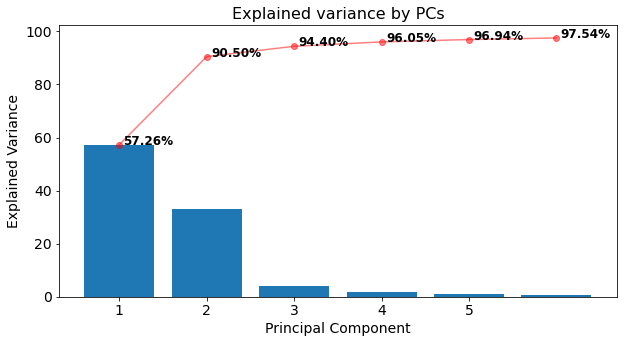

In [3]:
# run the pca decomposition

#pca = PCA(n_components=20)
pca = PCA(n_components=6)
pca.fit(y_train)
y_train_pca = pca.transform(y_train)

#plot the pca result
fig = plt.figure(figsize=(10,5))

#preparing the data for the plot
n_comp = np.arange(1,y_train_pca.shape[1]+1,1)
cumsum = (pca.explained_variance_ratio_*100).cumsum()

#plot the explained varience and its sum
ax1 = plt.gca()
ax1.bar(n_comp, pca.explained_variance_ratio_*100)
ax1.plot(n_comp, cumsum, '-ro', alpha=0.5)

#label the x-axis and y-axis
ax1.set_xlabel('Principal Component', fontsize=14)
ax1.set_ylabel('Explained Variance',fontsize=14)
ax1.set_title('Explained variance by PCs',fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
plt.xticks(np.arange(1,6,1))
#add the text label of the cumsum

formatted_weights = ['{:,.2%}'.format(x/100) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax1.annotate(txt, (n_comp[i]+0.05, cumsum[i]), fontweight='heavy',fontsize=12)

#plt.savefig("PCA explained-16direction CLD.png")    

### plot the PC scores

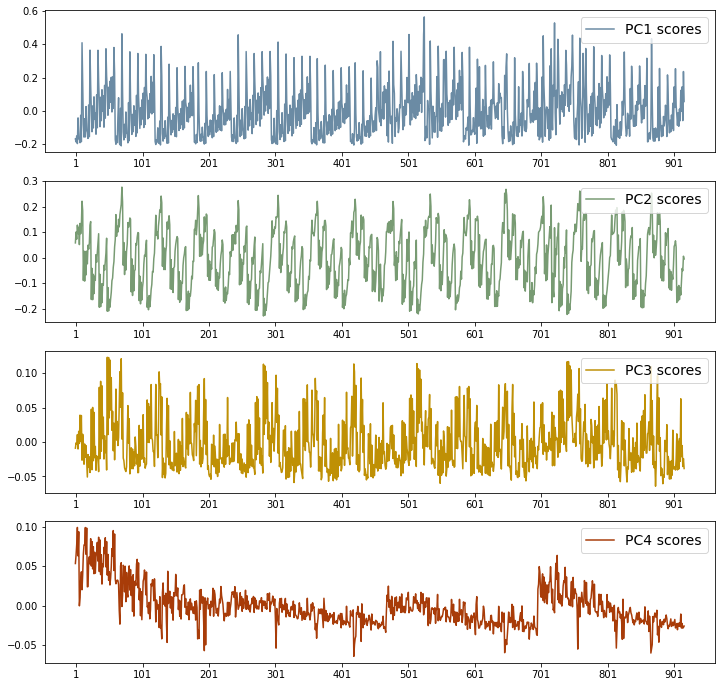

In [4]:
# plot the pca transformation in all data

y_input_pca = pca.transform(y_input)
color=['#6b8ba4','#789b73','#bf9005','#a83c09']
fig, axs = plt.subplots(4,1, figsize=(12, 12), facecolor='w', edgecolor='k')
number=int(y_input_pca.shape[0])
for i in range(4):
    axs[i].plot(np.arange(number),y_input_pca[:number,i],color[i], label='PC%d scores'%(i+1))
    axs[i].legend(loc = 'upper right',prop={'size': 14})
    axs[i].set_xticks(np.arange(1,number,100))


In [ ]:
y_input_pca[:number,0]
y_input_pca.shape

In [ ]:
# plot the training data and test data

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c='#868484',marker='x',label='training set')
c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c='#a83c09',marker='o',label='test set')

ax.set_xlabel('PC 1 scores',fontsize=16)
ax.set_ylabel('PC 2 scores',fontsize=16)
ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 and PC3 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

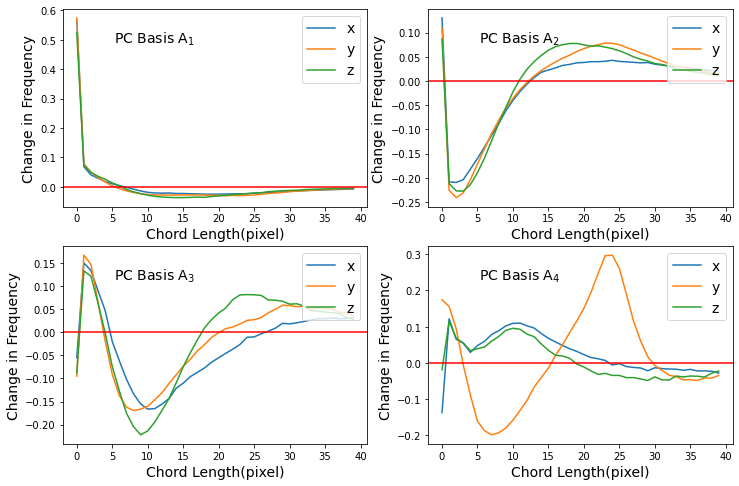

In [5]:
# plot the basis function 

y_pca_PC = pca.components_
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
CLD_length =int(y_pca_PC.shape[1]/3)
c = 0
for i in range(2):
    for k in range(2):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),y_pca_PC[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
        c = c+1
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        axs[i,k].set_ylabel('Change in Frequency',fontsize=14)
        axs[i,k].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,k].text(0.3,0.85,'PC Basis A$_{%d}$'%c,fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        #axs[i,k].hlines(y=0, xmin=0, xmax=40,color='k')
        axs[i,k].axhline(y=0, color='red')
#plt.savefig("PC basis.png")          

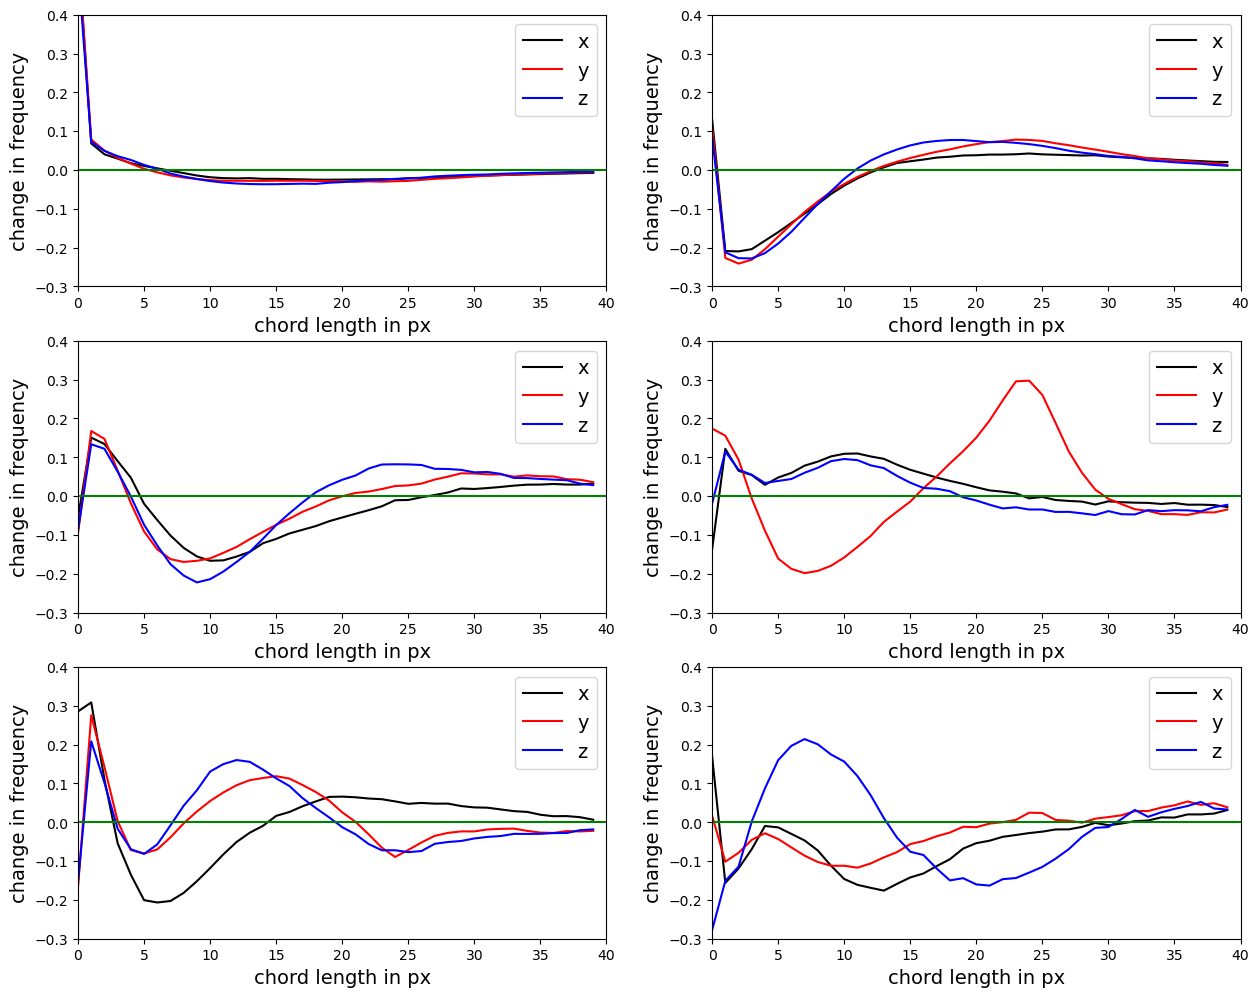

In [79]:
# plot the basis function 

y_pca_PC = pca.components_
colors = ['black','red', 'blue']
fig, axs = plt.subplots(3,2, figsize=(15, 12), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
CLD_length =int(y_pca_PC.shape[1]/3)
c = 0
for i in range(3):
    for k in range(2):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),y_pca_PC[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j], color=colors[j]) 
        c = c+1
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        axs[i,k].set_ylabel('change in frequency',fontsize=14)
        axs[i,k].set_xlabel('chord length in px',fontsize=14)
        #axs[i,k].text(0.3,0.85,'eigen vector A$_{%d}$'%c,fontsize=14,
         #             horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        #axs[i,k].hlines(y=0, xmin=0, xmax=40,color='k')
        axs[i,k].axhline(y=0, color='green')
        axs[i,k].set_xlim([0,40])
        axs[i,k].set_yticks(np.arange(-0.4,0.5,0.1))
        axs[i,k].set_ylim([-0.3, 0.4])
#plt.savefig("PC basis.png")



### the CLD reconstruction

In [ ]:
# to get the PC scores of a microstructure

y_train_pca[310,:]


In [6]:
#calculate different state of reconstruction

num = 310
pc0 = pca.mean_
pc1 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]
pc2 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]
pc3 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]+y_train_pca[num,3]*y_pca_PC[3,:]
pc4 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]+y_train_pca[num,3]*y_pca_PC[3,:]+y_train_pca[num,4]*y_pca_PC[4,:]
CLD = np.vstack((pc0, pc1, pc2, pc3, pc4,y_train[num,:]))

In [ ]:
print(pc0.shape,
pc1.shape,
CLD.shape)

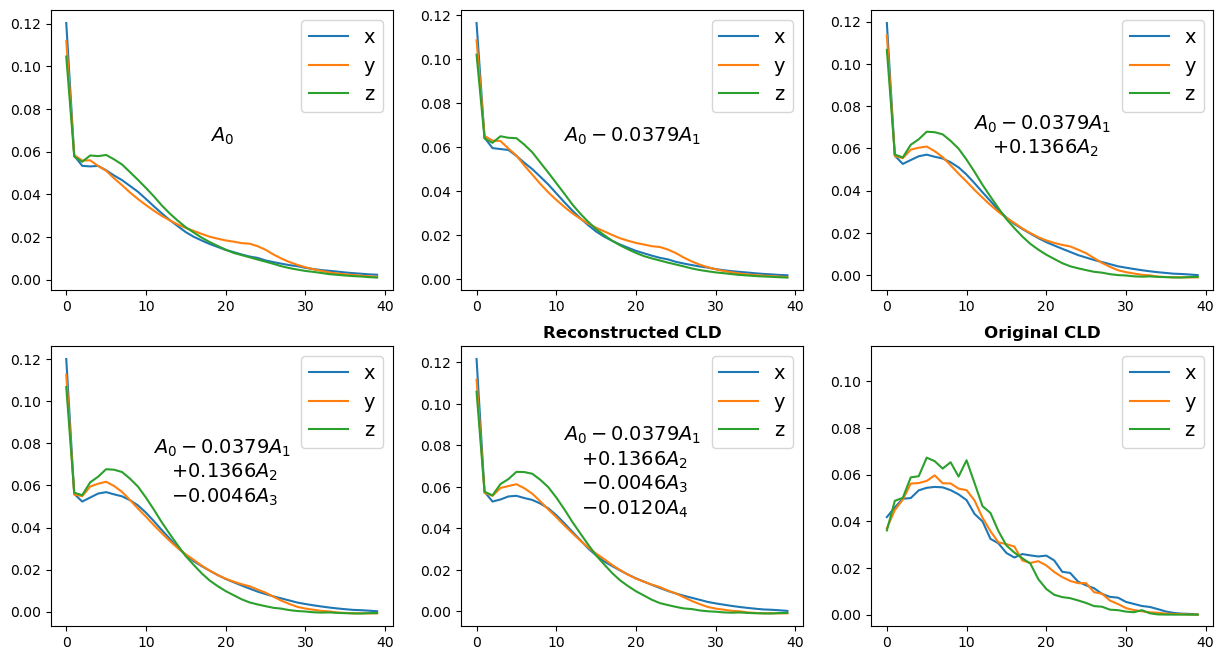

In [127]:
# plot different reconstrcution

z = pca.mean_
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
recon_text=['$A_0$',
            '$A_0 -0.0379 A_1$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$\n $-0.0120 A_4$',
            ''
           ]
z=0
for i in range(2):
    for k in range(3):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
        
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        #axs[i,k].set_ylabel('Change in Frequency',fontsize=14)
        #axs[i,k].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,k].text(0.5,0.55,recon_text[z],fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        z = z+1
        
axs[1,2].set_ylim([-0.005,0.115])
axs[1,2].set_title('Original CLD',fontweight='heavy')
axs[1,1].set_title('Reconstructed CLD' ,fontweight='heavy')
plt.savefig("CLD reconstruction.png")  

In [ ]:
CLD

# machine learning training

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm 
from sklearn.neural_network import MLPRegressor

#polynominal regression
poly = Pipeline([('poly', PolynomialFeatures(degree=4, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])

#random forest regression
RFregr = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features='sqrt', max_depth=8, random_state=0)

#kernel ridge regression
#krr = KernelRidge(alpha=0.01,kernel="poly", gamma=0.01, degree=4)

#k-Nearest Neighbor regression
#knn = KNeighborsRegressor(n_neighbors=3, weights='distance',p=1)

#support vector regression
svr = MultiOutputRegressor(
    svm.NuSVR(kernel='poly', degree=3, C=100,
            #gamma='scale',coef0=1,
            # nu = 0.5, tol=0.001,
            #shrinking=True, cache_size=500,
            #verbose=False, max_iter=- 1
            )
                          )
#mlp
mlp= MLPRegressor(hidden_layer_sizes=(100, 100, 50, 25),learning_rate='constant',
                  solver='adam',activation='tanh',alpha=0.1, max_iter=400, random_state=100
    )

#gradient boosting regression
reg =  MultiOutputRegressor(GradientBoostingRegressor(random_state=5))

In [83]:
# PCA 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly, X = X_train, y = y_train_pca, cv=5)
score_svr = cross_val_score(svr, X = X_train, y = y_train_pca, cv=5)
score_RFregr = cross_val_score(RFregr, X = X_train, y = y_train_pca, cv=5)
score_mlp = cross_val_score(mlp, X = X_train, y = y_train_pca, cv=5)

In [ ]:
# kernel PCA 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly, X = X_train, y = y_train_kernel_pca, cv=5)
score_svr = cross_val_score(svr, X = X_train, y = y_train_kernel_pca, cv=5)
score_RFregr = cross_val_score(RFregr, X = X_train, y = y_train_kernel_pca, cv=5)
score_mlp = cross_val_score(mlp, X = X_train, y = y_train_kernel_pca, cv=5)

In [ ]:
# t-Sne 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly, X = X_train, y = Y_embedded, cv=5)
score_svr = cross_val_score(svr, X = X_train, y = Y_embedded, cv=5)
score_RFregr = cross_val_score(reg, X = X_train, y = Y_embedded, cv=5)
score_mlp = cross_val_score(mlp, X = X_train, y = Y_embedded, cv=5)

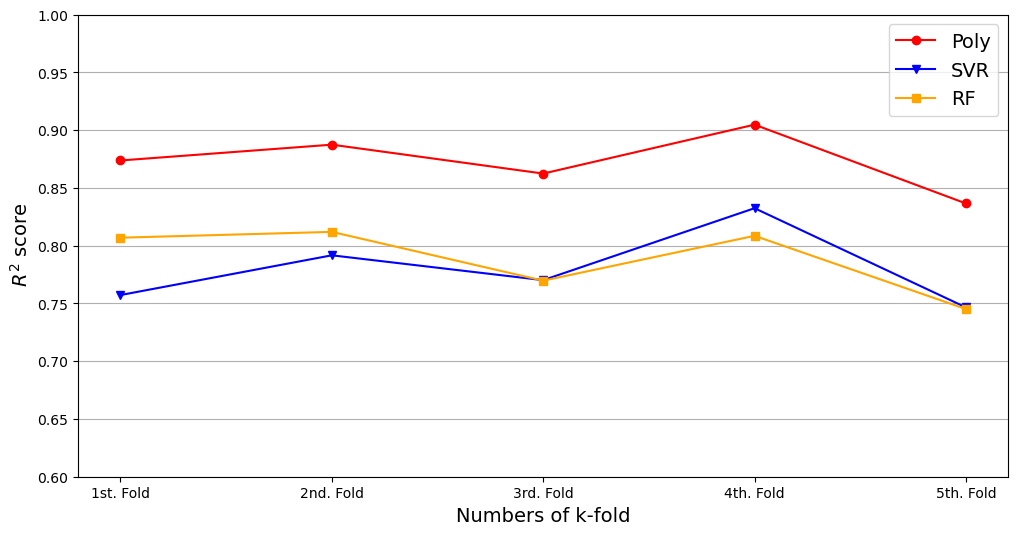

In [87]:
# plot the result of cross-validation
plt.figure(figsize=(12,6))
plt.plot(range(5),score_poly, 'red',marker='o',label='Poly')
plt.plot(range(5),score_svr,'blue',marker='v', label='SVR')
plt.plot(range(5),score_RFregr,'orange',marker='s', label='RF')
#plt.plot(range(5),score_mlp,'green',marker='s', label='MLP')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
#plt.text(0.2,0.80,'Poly $\:R^2$:  {:0.3f}'.format(np.mean(score_poly)),fontsize=14)
#plt.text(0.2,0.77,'SVR $\:R^2$: {:0.3f}'.format(np.mean(score_svr)),fontsize=14)
#plt.text(0.2,0.74,'RF $\:R^2$:    {:0.3f}'.format(np.mean(score_RFregr)),fontsize=14)
#plt.text(0.2,0.71,'MLP $\:R^2$: {:0.3f}'.format(np.mean(score_mlp)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.grid(axis='y')
plt.ylabel('$\:R^2$ score',fontsize=14)
plt.savefig("ML_pca_notext_larger_size.png", transparent=False)

### tuning the hyperparameters of polynomial regression

Text(0, 0.5, 'R2 score')

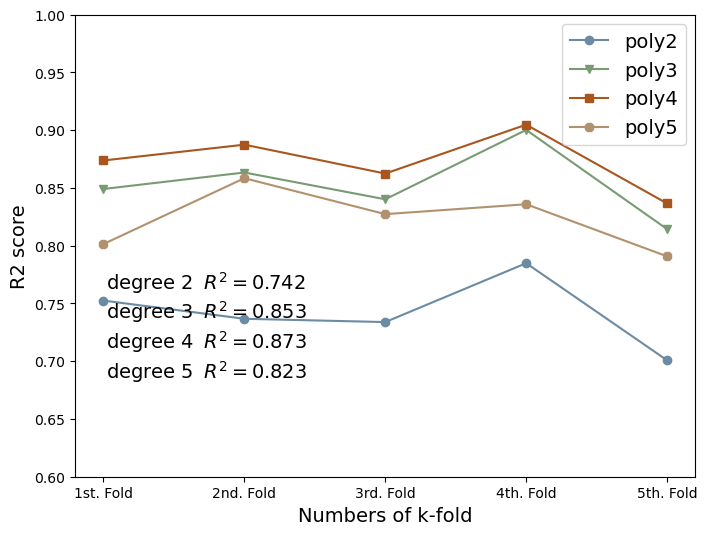

In [89]:
# 5-fold cross-validation for the polynomial tuning

from sklearn.model_selection import ShuffleSplit, cross_val_score

poly2 = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])


score2 = cross_val_score(poly2, X = X_train, y = y_train_pca, cv=5)
score3 = cross_val_score(poly3, X = X_train, y = y_train_pca, cv=5)
score4 = cross_val_score(poly4, X = X_train, y = y_train_pca, cv=5)
score5 = cross_val_score(poly5, X = X_train, y = y_train_pca, cv=5)

# plot the result of cross-validation
plt.figure(figsize=(8,6))
plt.plot(range(5),score2, '#6b8ba4',marker='o',label='poly2')
plt.plot(range(5),score3,'#789b73',marker='v', label='poly3')
plt.plot(range(5),score4,'#a9561e',marker='s', label='poly4')
plt.plot(range(5),score5,'#b1916e',marker='8', label='poly5')


plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
text = ('degree 2 $\:R^2 = {:0.3f}$ \n'\
        'degree 3 $\:R^2 = {:0.3f}$ \n'\
        'degree 4 $\:R^2 = {:0.3f}$ \n'\
        'degree 5 $\:R^2 = {:0.3f}$ \n'       
        .format(np.mean(score2),
                np.mean(score3),
                np.mean(score4),
                np.mean(score5)
                            
               )
       )
plt.gca().text(0.05, 0.45, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)

In [ ]:
svr = MultiOutputRegressor(
    svm.NuSVR(kernel='poly', degree=3,
            #gamma='scale',coef0=1,
            nu = 0.5, C=500, tol=0.001,
            #shrinking=True, cache_size=500,
            #verbose=False, max_iter=- 1
            )
                          )
score_svr = cross_val_score(svr, X = X_train, y = y_train_pca, cv=5)
score_svr.mean()

In [ ]:
#space for mlp
parameter_space = {
    'hidden_layer_sizes': [((100,100,50,25))],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['adam'],
    'alpha': [0.1,0.01],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[50,100,200,400,600]
}

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_validate, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.decomposition import KernelPCA

mlp = MLPRegressor()
clf = GridSearchCV(mlp, parameter_space, scoring='r2', verbose = 0, n_jobs=-1, cv=5)
grid_result = clf.fit(X_train, Y_embedded)

best_params = grid_result.best_params_

best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 500, n_iter_no_change = 200
              )

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'}



In [84]:
#space for RF
parameter_space = {
    'n_estimators': [100,200,300,500],
    'max_depth':[3,5,6,8],
    'max_features':[1,'sqrt','log2'],
    'min_samples_split':[2,3,4],
   
}

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_validate, cross_val_score

clf = GridSearchCV(RFregr, parameter_space, scoring='r2', verbose = 0, n_jobs=-1, cv=5)
grid_result = clf.fit(X_train, y_train_kernel_pca)

best_params = grid_result.best_params_

best_rf = RandomForestRegressor(n_estimators = best_params["n_estimators"], 
                        max_depth =best_params["max_depth"],
                        max_features=best_params["max_features"],
                        min_samples_split=best_params["min_samples_split"],
                       
              )

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'}



In [ ]:
#space for GradBoost
parameter_space = {
    'learning_rate': [0.1,0.01,0.001],
    'n_estimators': [100,200,300,500],
    'max_depth':[3,5,6,8],
    'max_features':[1,'sqrt','log2'],
    'min_samples_split':[2,3,4],
   
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

x, y = X_train, y_train

model = MultiOutputRegressor(GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                                       criterion='friedman_mse', min_samples_split=2,
                                                       min_samples_leaf=1,
                                                       min_weight_fraction_leaf=0.0, max_depth=3,
                                                       min_impurity_decrease=0.0,
                                                       init=None, random_state=None,
                                                       max_features=None,
                                                       alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                                       validation_fraction=0.1, n_iter_no_change=None, tol=0.0001,
                                                       ccp_alpha=0.0))

hyperparameters = dict(estimator__learning_rate=[0.05, 0.1, 0.2, 0.5, 0.9], estimator__loss=['ls', 'lad', 'huber'],
                     estimator__n_estimators=[20, 50, 100, 200, 300, 500, 700, 1000],
                     estimator__criterion=['friedman_mse', 'mse'], estimator__min_samples_split=[2, 4, 7, 10],
                     estimator__max_depth=[3, 5, 10, 15, 20, 30], estimator__min_samples_leaf=[1, 2, 3, 5, 8, 10],
                     estimator__min_impurity_decrease=[0, 0.2, 0.4, 0.6, 0.8],
                     estimator__max_leaf_nodes=[5, 10, 20, 30, 50, 100, 300])

randomized_search = RandomizedSearchCV(model, hyperparameters, random_state=0, n_iter=5, scoring=None,
                                       n_jobs=2, refit=True, cv=5, verbose=True,
                                       pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

hyperparameters_tuning = randomized_search.fit(x, y)
print('Best Parameters = {}'.format(hyperparameters_tuning.best_params_))

tuned_model = hyperparameters_tuning.best_estimator_


In [ ]:
#space for SVR
parameter_space = {
    'kernel': ['rbf','linear','poly'],
    'degree':[2,3,5],
    'gamma':['auto','scale'],
    'C':[0.5,1,5,10],
    'epsilon':[0.1,0.01,0.5,1]
   
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

x, y = X_train, y_train_pca

model = MultiOutputRegressor(svm.SVR())

hyperparameters = dict(kernel=['rbf','linear','poly','sigmoid'], degree=[1,2,3,4,5],
                     gamma=['auto','scale'],
                     C=[0.2,0.5,1,5], epsilon=[0.1,0.05,0.5]
                     )

randomized_search = RandomizedSearchCV(model, hyperparameters, random_state=0, n_iter=100, scoring=None,
                                       n_jobs=2, refit=True, cv=5, verbose=True,
                                       pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)

hyperparameters_tuning = randomized_search.fit(x, y)
print('Best Parameters = {}'.format(hyperparameters_tuning.best_params_))

tuned_model = hyperparameters_tuning.best_estimator_


In [ ]:
msvr = MSVR(kernel = 'rbf', gamma = 0.1)
result = msvr.fit(X_train, y_train_pca)

In [ ]:
print(clf.best_score_,
clf.best_params_)

In [ ]:
scores = cross_val_score(best_mlp, X_train, y_train_pca, cv=5)

In [ ]:
df = pd.DataFrame(clf.cv_results_)

RF
kernel, PCA, tsne 
mlp
kernel 81.6, PCA 78.9, tsne 88
GBC
tsne
Best Parameters = {'estimator__n_estimators': 1000, 'estimator__min_samples_split': 4, 'estimator__min_samples_leaf': 2, 
                   'estimator__min_impurity_decrease': 0.4, 'estimator__max_leaf_nodes': 30, 'estimator__max_depth': 15, 
                   'estimator__loss': 'lad', 'estimator__learning_rate': 0.2, 'estimator__criterion': 'friedman_mse'}

### plot the training data in th parity plot

Text(0, 0.5, 'Prediction')

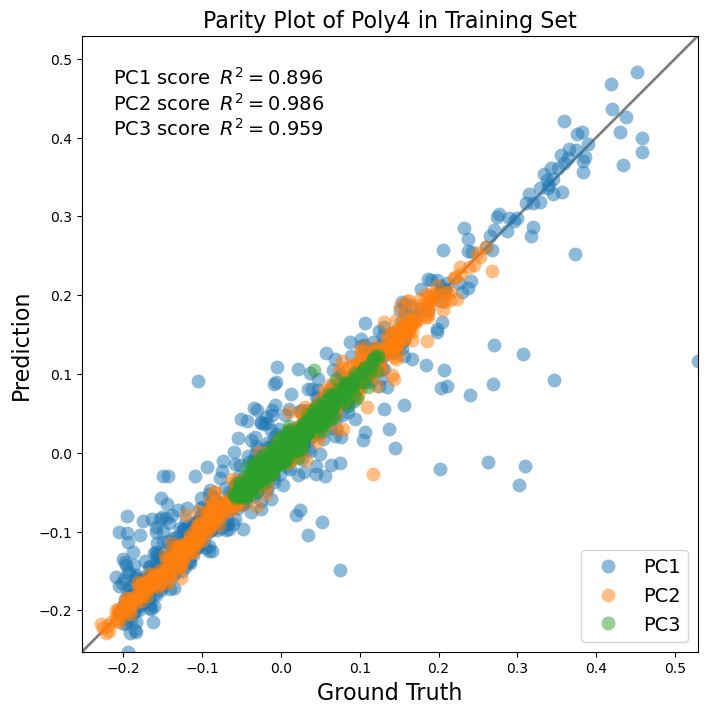

In [94]:
from sklearn.metrics import r2_score

poly4.fit(X = X_train, y = y_train_pca)
y_pred4 = poly4.predict(X_train)


# Plot Figures
fignow = plt.figure(figsize=(8,8))

x = y_train_pca
y = y_pred4 #.reshape(1,-1) # ypreds from loo results, y_pred from the whole test data 


## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")
ax.plot([0, 1], [0, 1], "k-", alpha=0.5 ,lw=2 ,transform=ax.transAxes)
plt.plot(x[:,0],y[:,0],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC1')
plt.plot(x[:,1],y[:,1],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC2')
plt.plot(x[:,2],y[:,2],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC3')
#plt.plot(x[:,3],y[:,3],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC4')
# Calculate Statistics of the Parity Plot 

text = ('PC1 score $\:R^2 = {:0.3f}$ \n'\
        'PC2 score $\:R^2 = {:0.3f}$ \n'\
        'PC3 score $\:R^2 = {:0.3f}$ \n'\
        #'PC4 score $\:R^2 = {:0.3f}$ \n'\
        
        .format(r2_score(x[:,0],y[:,0]),
                r2_score(x[:,1],y[:,1]),
                r2_score(x[:,2],y[:,2]),
                #r2_score(x[:,3],y[:,3]),
               
               
               )
       )

plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')
plt.legend(loc = 'lower right',prop={'size': 14})
#loc = 'upper left', 'upper right', 'lower left', 'lower right' 
#
#
# Title and labels 
plt.title("Parity Plot of Poly4 in Training Set",fontsize=16)
plt.xlabel('Ground Truth',fontsize=16)
plt.ylabel('Prediction',fontsize=16)
#plt.savefig("trainset_poly4.png") 

In [ ]:
bounds

### plot the test data in th parity plot

Text(0, 0.5, 'Prediction')

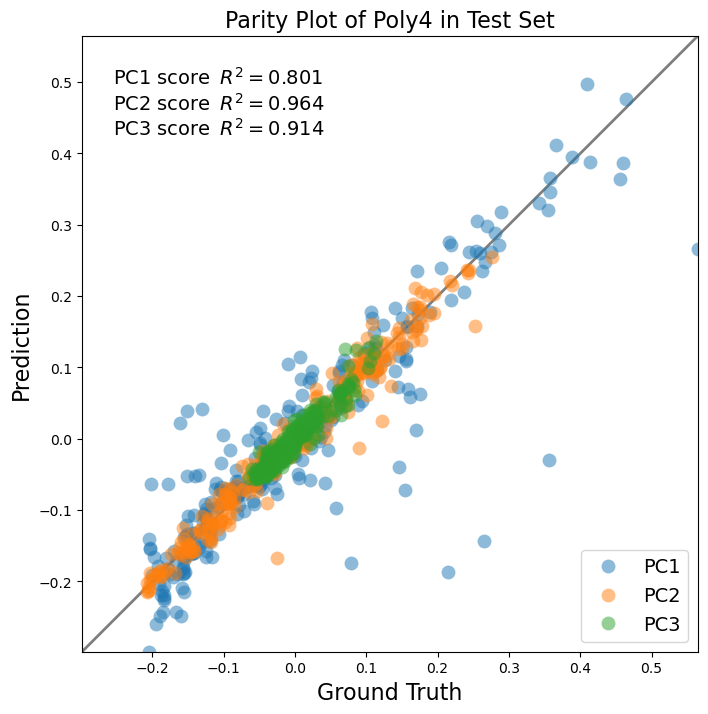

In [93]:
# pca transform the test data
y_test_pca = pca.transform(y_test)


from sklearn.metrics import r2_score

y_pred_test =poly4.predict(X_test)

# Plot Figures
fignow = plt.figure(figsize=(8,8))

x = y_test_pca

y = y_pred_test

## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")

ax.plot([0, 1], [0, 1], "k-", alpha=0.5 ,lw=2 ,transform=ax.transAxes)
plt.plot(x[:,0],y[:,0],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC1')
plt.plot(x[:,1],y[:,1],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC2')
plt.plot(x[:,2],y[:,2],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC3')
#plt.plot(x[:,3],y[:,3],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC4')

# Calculate Statistics of the Parity Plot 

text = ('PC1 score $\:R^2 = {:0.3f}$ \n'\
        'PC2 score $\:R^2 = {:0.3f}$ \n'\
        'PC3 score $\:R^2 = {:0.3f}$ \n'\
       #'PC4 score $\:R^2 = {:0.3f}$ \n'\
        
        .format(r2_score(x[:,0],y[:,0]),
                r2_score(x[:,1],y[:,1]),
                r2_score(x[:,2],y[:,2]),
                #r2_score(x[:,3],y[:,3]),
               
               
               )
       )
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.legend(loc = 'lower right',prop={'size': 14})
# Title and labels 
plt.title("Parity Plot of Poly4 in Test Set",fontsize=16)
plt.xlabel('Ground Truth',fontsize=16)
plt.ylabel('Prediction',fontsize=16)
#plt.savefig("testset_poly3.png") 

# reconstruction of CLD and their MAE

### Mean absolute error:
 $$MAE = (\frac{1}{n*\bar{y}_{i}})\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

### histgram of the MAE

In [95]:
y_preds_test_pca = poly4.predict(X_test)
y_reconstruct = pca.inverse_transform(y_preds_test_pca)
MAE = np.abs(y_reconstruct-y_test)
MAE_si = np.sum(MAE, axis=1)/(MAE.shape[1]-1)
MAE_normalized = MAE_si/np.mean(y_reconstruct)
large_MAE = np.argwhere(MAE_normalized > 0.2 ).reshape(1,-1)
print(large_MAE,large_MAE.shape)
print(np.argmax(MAE_normalized),np.max(MAE_normalized))

[[ 19  39  42  54  56  58  59  65  71 101 114 120 121 123 135 138 148 154
  164 211 216 219 255 259 260]] (1, 25)
259 0.5627536100173075


In [ ]:
# plot the histogram

plt.figure(figsize=(8,6))
plt.hist(MAE_normalized , bins=20,histtype = 'bar', align = 'mid',rwidth = 0.8 )
plt.xlabel('Normalized MAE',fontsize=16)
plt.ylabel('Numbers of Structures',fontsize=16)
#plt.savefig("hist of MAE.png") 

### the maxmium mean absolute error(only 1 in 275 test set)

In [ ]:
z = np.argmax(MAE_normalized)
fig, axs = plt.subplots(2,1, figsize=(6, 9), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
CLD_length =int(y_pca_PC.shape[1]/3)
for j in range(3):
    axs[0].plot(range(CLD_length),y_test[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
    axs[1].plot(range(CLD_length),y_reconstruct[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
axs[0].legend(loc = 'upper right',prop={'size': 14})
axs[1].legend(loc = 'upper right',prop={'size': 14})
axs[0].text(0.5,0.85, 'original',fontsize=12,color='k',
            horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.5,0.85,'reconstructed',fontsize=12,color='k',
            horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)
axs[1].set_ylim([-0.01,0.32])
axs[0].set_ylabel('Frequency',fontsize=16)
axs[1].set_ylabel('Frequency',fontsize=16)
axs[0].set_xlabel('Chord Length',fontsize=16)
axs[1].set_xlabel('Chord Length',fontsize=16)
plt.savefig("max MAE.png") 

### the representitive mean absolute error(around 171 in 264 test set)

c = 237 or 30

In [ ]:
# obtain the frequent data set

threshold_min = np.argwhere(MAE_si > 0.002 ).reshape(1,-1)
threshold_max =  np.argwhere(MAE_si < 0.004 ).reshape(1,-1)
frequent = np.intersect1d(threshold_min,threshold_max)
print(frequent.shape)

# select 3 data
c = random.choice(frequent)

# plot the selected data
fig, axs = plt.subplots(2,1, figsize=(8, 12), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
CLD_length =int(y_pca_PC.shape[1]/3)
for j in range(3):
    axs[0].plot(range(CLD_length),y_test[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
    axs[1].plot(range(CLD_length),y_reconstruct[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
axs[0].legend(loc = 'upper right',prop={'size': 14})
axs[1].legend(loc = 'upper right',prop={'size': 14})
axs[0].text(0.5,0.85, 'original',fontsize=12,color='k',
            horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.5,0.85,'reconstructed',fontsize=16,color='k',
            horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)
axs[0].set_ylabel('Frequency',fontsize=16)
axs[1].set_ylabel('Frequency',fontsize=16)
axs[0].set_xlabel('Chord Length',fontsize=16)
axs[1].set_xlabel('Chord Length (Pixel)',fontsize=16)
plt.savefig("representitive MAE.png") 

In [ ]:
# plot different reconstrcution

z = pca.mean_
print(z.shape)
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
recon_text=['$A_0$',
            '$A_0 -0.0379 A_1$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$\n $-0.0120 A_4$',
            ''
           ]
z=0
for i in range(2):
    for k in range(3):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
        
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        #axs[i,k].set_ylabel('Change in Frequency',fontsize=14)
        #axs[i,k].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,k].text(0.5,0.55,recon_text[z],fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        z = z+1
        
axs[1,2].set_ylim([-0.005,0.115])
axs[1,2].set_title('Original CLD',fontweight='heavy')
axs[1,1].set_title('Reconstructed CLD' ,fontweight='heavy')
plt.savefig("CLD reconstruction.png")  

(159,)
107


(0.0, 0.08)

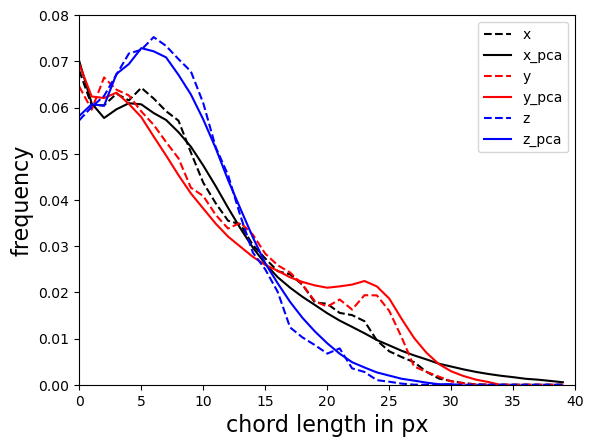

In [104]:
# obtain the frequent data set

threshold_min = np.argwhere(MAE_si > 0.002 ).reshape(1,-1)
threshold_max =  np.argwhere(MAE_si < 0.004 ).reshape(1,-1)
frequent = np.intersect1d(threshold_min,threshold_max)
print(frequent.shape)

# select 3 data
#c = random.choice(frequent)
c = 107
#c = 92
colors =["black","red","blue"]
print(c)
# plot the selected data
#fig, axs = plt.plot(2,1, figsize=(8, 12), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
strlabel2 = ['x_pca','y_pca','z_pca']
CLD_length =int(y_pca_PC.shape[1]/3)
for j in range(3):
    plt.plot(range(CLD_length),y_test[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j], linestyle='dashed', color =colors[j]) 
    plt.plot(range(CLD_length),y_reconstruct[c,:].reshape(3,CLD_length)[j,:],label=strlabel2[j], color =colors[j]) 
    #plt.plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
plt.ylabel('frequency',fontsize=16)
plt.xlabel('chord length in px',fontsize=16)
plt.legend()
plt.xlim([0,40])
plt.ylim([0,0.08])
#plt.savefig("representitive MAE.png") 

In [ ]:
# plot different reconstrcution

z = pca.mean_
print(z.shape)
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
recon_text=['$A_0$',
            '$A_0 -0.0379 A_1$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$\n $-0.0120 A_4$',
            ''
           ]
z=0
for i in range(2):
    for k in range(3):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
        
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        #axs[i,k].set_ylabel('Change in Frequency',fontsize=14)
        #axs[i,k].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,k].text(0.5,0.55,recon_text[z],fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        z = z+1
        
axs[1,2].set_ylim([-0.005,0.115])
axs[1,2].set_title('Original CLD',fontweight='heavy')
axs[1,1].set_title('Reconstructed CLD' ,fontweight='heavy')
plt.savefig("CLD reconstruction.png")  

### plot the PC scores in 3D space and colored with the MAE

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
#calculate MAE for training set
c = ax.scatter(y_train_pca[:,0], y_train_pca[:,1],y_train_pca[:,2], c='#868484',marker='x',label='input data')
#c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c=MAE_normalized,marker='o',label='test set')

ax.set_xlabel('PC 1 scores',fontsize=16)
ax.set_ylabel('PC 2 scores',fontsize=16)
ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 and PC3 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

In [ ]:
y_preds_train_pca = poly4.predict(X_train)
y_reconstruct_train = pca.inverse_transform(y_preds_train_pca)
MAE_train = np.abs(y_reconstruct_train-y_train)
MAE_si_train = np.sum(MAE_train, axis=1)/(MAE_train.shape[1]-1)
MAE_normalized_train = MAE_si_train/np.mean(y_reconstruct_train)
MAE_normalized_train.shape
#large_MAE = np.argwhere(MAE_normalized > 0.2 ).reshape(1,-1)
#print(large_MAE,large_MAE.shape)
#print(np.argmax(MAE_normalized),np.max(MAE_normalized))

In [ ]:
y_train.shape

In [ ]:
# 2D

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
#calculate MAE for training set
c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c=MAE_normalized_train,marker='o',label='training set')
c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c=MAE_normalized,marker='o',label='test set')

ax.set_xlabel('PC 1 scores',fontsize=16)
ax.set_ylabel('PC 2 scores',fontsize=16)
ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 and PC3 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

In [ ]:
# 3D PC plot on test set 

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
#calculate MAE for training set
#c = ax.scatter(y_train[:,0], y_train[:,1],y_train[:,2], c=MAE_normalized_train,marker='o',label='training set')
c = ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2],c=MAE_normalized,marker='o',label='test set')

ax.set_xlabel('PC 1 scores',fontsize=16)
ax.set_ylabel('PC 2 scores',fontsize=16)
ax.set_zlabel('PC 3 scores',fontsize=16)
ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 and PC3 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

In [ ]:
# 2D PC plots on training set 

fig, axs = plt.subplots(1,3, figsize=(10, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)
#[[  9  45 148 157 202 252 259]] (1, 7)

axs[0].scatter(y_train[:,0],y_train[:,1],label='training_set', c=MAE_normalized_train)
axs[1].scatter(y_train[:,0],y_train[:,2],label='training_set', c=MAE_normalized_train)
axs[2].scatter(y_train[:,1],y_train[:,2],label='training_set', c=MAE_normalized_train)

axs[0].set_ylabel('PC Score 2')
axs[0].set_xlabel('PC Score 1')
axs[1].set_ylabel('PC Score 3')
axs[1].set_xlabel('PC Score 1')
axs[2].set_ylabel('PC Score 3')
axs[2].set_xlabel('PC Score 2')

#fig.colorbar(c, label='MAE')
#plt.grid()  
#plt.title('2d representation')

In [ ]:
# 2D PC plots on test set 

fig, axs = plt.subplots(1,3, figsize=(10, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)


axs[0].scatter(y_test[:,0],y_test[:,1],label='test_set', c=MAE_normalized)
for i in large_MAE:
    
    axs[0].scatter(y_test[i,0],y_test[i,1],label='training_set', c='red')
axs[1].scatter(y_test[:,0],y_test[:,2],label='test_set', c=MAE_normalized)
axs[2].scatter(y_test[:,1],y_test[:,2],label='test_set', c=MAE_normalized)

axs[0].set_ylabel('PC Score 2')
axs[0].set_xlabel('PC Score 1')
axs[1].set_ylabel('PC Score 3')
axs[1].set_xlabel('PC Score 1')
axs[2].set_ylabel('PC Score 3')
axs[2].set_xlabel('PC Score 2')

#fig.colorbar(c, label='MAE')

#plt.grid()  
#plt.title('2d representation')

In [ ]:
y_preds_input_pca = poly4.predict(X_input)
y_reconstruct_input = pca.inverse_transform(y_preds_input_pca)
MAE_input = np.abs(y_reconstruct_input-y_input)
MAE_si_input = np.sum(MAE_input, axis=1)/(MAE_input.shape[1]-1)
MAE_normalized_input = MAE_si_input/np.mean(y_reconstruct_input)
MAE_normalized_input.shape

In [ ]:
large_MAE = np.argwhere(MAE_normalized > 0.2 ).reshape(1,-1)
print(large_MAE,large_MAE.shape)
MAE_normalized.shape
#print(np.argmax(MAE_normalized),np.max(MAE_normalized))

In [ ]:
y_input_pca.shape

In [ ]:
y_reconstruct_input = pca.inverse_transform(y_input_pca)
MAE_input = np.abs(y_reconstruct_input-y_input)
MAE_si_input = np.sum(MAE_input, axis=1)/(MAE_input.shape[1]-1)
MAE_normalized_input = MAE_si_input/np.mean(y_reconstruct_input)
MAE_normalized_input.shape
#large_MAE = np.argwhere(MAE_normalized > 0.2 ).reshape(1,-1)
#print(large_MAE,large_MAE.shape)
#print(np.argmax(MAE_normalized),np.max(MAE_normalized))

In [ ]:
# 2D PC plots on whole data set (y_input_pca) 

fig, axs = plt.subplots(1,3, figsize=(10, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)


axs[0].scatter(y_input[:,0],y_input[:,1],label='test_set', c=MAE_normalized_input)
for i in large_MAE:
    axs[0].scatter(y_test[i,0],y_test[i,1],label='training_set', c='red')
axs[1].scatter(y_input[:,0],y_input[:,2],label='test_set', c=MAE_normalized_input)
for i in large_MAE:
    axs[1].scatter(y_test[i,0],y_test[i,2],label='training_set', c='red')
axs[2].scatter(y_input[:,1],y_input[:,2],label='test_set', c=MAE_normalized_input)
for i in large_MAE:
    axs[2].scatter(y_test[i,1],y_test[i,2],label='training_set', c='red')
axs[0].set_ylabel('PC Score 2')
axs[0].set_xlabel('PC Score 1')
axs[1].set_ylabel('PC Score 3')
axs[1].set_xlabel('PC Score 1')
axs[2].set_ylabel('PC Score 3')
axs[2].set_xlabel('PC Score 2')

#fig.colorbar(c, label='MAE')

#plt.grid()  
#plt.title('2d representation')

In [ ]:
# 2D PC plot on X_train

fig, axs = plt.subplots(1,3, figsize=(10, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)


axs[0].scatter(X_train[:,0],X_train[:,1],label='train_set', c=MAE_normalized_train)
axs[1].scatter(X_train[:,0],X_train[:,2],label='train_set', c=MAE_normalized_train)
axs[2].scatter(X_train[:,1],X_train[:,2],label='train_set', c=MAE_normalized_train)

axs[0].set_ylabel('PC Score 2')
axs[0].set_xlabel('PC Score 1')
axs[1].set_ylabel('PC Score 3')
axs[1].set_xlabel('PC Score 1')
axs[2].set_ylabel('PC Score 3')
axs[2].set_xlabel('PC Score 2')

fig.colorbar(c, label='MAE')

#plt.grid()  
#plt.title('2d representation')

In [ ]:
# 2D PC plot on X_test

fig, axs = plt.subplots(1,3, figsize=(10, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)


axs[0].scatter(X_test[:,0],X_test[:,1],label='test_set', c=MAE_normalized)
axs[1].scatter(X_test[:,0],X_test[:,2],label='test_set', c=MAE_normalized)
axs[2].scatter(X_test[:,1],X_test[:,2],label='test_set', c=MAE_normalized)

axs[0].set_ylabel('PC Score 2')
axs[0].set_xlabel('PC Score 1')
axs[1].set_ylabel('PC Score 3')
axs[1].set_xlabel('PC Score 1')
axs[2].set_ylabel('PC Score 3')
axs[2].set_xlabel('PC Score 2')

fig.colorbar(c, label='MAE')

#plt.grid()  
#plt.title('2d representation')

In [ ]:
# plot the training data and test data

fig, axs = plt.subplots(1, 3, figsize=(16, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)
for i,j in zip(range(3), range(3,6)):
        axs[i].scatter(y_train[:,1], y_train[:,2], c=X_train[:,j], marker='x',label='training set')
        axs[i].scatter(y_test[:,1], y_test[:,2], c=X_test[:,j], marker='o',label='test set')

for ax in axs:
  ax.set_xlabel('PC 2 scores',fontsize=16)
  ax.set_ylabel('PC 3 scores',fontsize=16)
  ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

In [ ]:
# plot the training data and test data

fig, axs = plt.subplots(1, 3, figsize=(16, 8), facecolor='w', edgecolor='k', sharex=True, sharey = True)
for i in range(3):
  axs[i].scatter(y_train[:,1], y_train[:,2], c=X_train[:,i], marker='x',label='training set')
  axs[i].scatter(y_test[:,1], y_test[:,2], c=X_test[:,i], marker='o',label='test set')

for ax in axs:
  ax.set_xlabel('PC 2 scores',fontsize=16)
  ax.set_ylabel('PC 3 scores',fontsize=16)
  ax.legend(loc = 'upper right',prop={'size': 14})
plt.title("Scatter plot of PC1 PC2 scores",fontsize=16)
#ax.view_init(45, 35)
plt.colorbar(c)

In [ ]:
#For interactive 3D plots
#%matplotlib notebook
%matplotlib inline

In [ ]:
# plot the training data and test data
  
fig = plt.figure(figsize=(32, 8))

for i in range(3):
  axs = fig.add_subplot(1, 3, i+1, projection='3d')
  axs = fig.add_subplot(1, 3, i+1, projection='3d')
  axs.scatter(y_train[:,0], y_train[:,1], y_train[:,2], c=X_train[:,i], marker='x',label='training set')
  axs.scatter(y_test[:,0], y_test[:,1], y_test[:,2], c=X_test[:,i], marker='o',label='test set')


  axs.set_xlabel('PC 1 scores',fontsize=16)
  axs.set_ylabel('PC 2 scores',fontsize=16)
  axs.set_ylabel('PC 3 scores',fontsize=16)
  axs.legend(loc = 'upper right',prop={'size': 14})

plt.title("Scatter plot of PC1 PC2 PC3 scores",fontsize=16)
#ax.view_init(45, 35)
#plt.colorbar(c)


# save figure

plt.savefig("pc1pc2pc3_1-3oC.png")

In [ ]:
# plot the training data and test data

fig = plt.figure(figsize=(32, 8))

for i,j in zip(range(3), range(3,6)):
  axs = fig.add_subplot(1, 3, i+1, projection='3d')
  axs = fig.add_subplot(1, 3, i+1, projection='3d')
  axs.scatter(y_train[:,0], y_train[:,1], y_train[:,2], c=X_train[:,j], marker='x',label='training set')
  axs.scatter(y_test[:,0], y_test[:,1], y_test[:,2], c=X_test[:,j], marker='o',label='test set')


  axs.set_xlabel('PC 1 scores',fontsize=16)
  axs.set_ylabel('PC 2 scores',fontsize=16)
  axs.set_ylabel('PC 3 scores',fontsize=16)
  axs.legend(loc = 'upper right',prop={'size': 14})

plt.title("Scatter plot of PC1 PC2 PC3 scores",fontsize=16)
#ax.view_init(45, 35)
#plt.colorbar(c)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

In [ ]:
KernelPCA(
    n_components=5, kernel="poly", gamma=10, fit_inverse_transform=True, alpha=0.1
)

In [ ]:
y_train_kernel_pca = kernel_pca.fit(y_train).transform(y_train)

In [ ]:
fig, (orig_data_ax, kernel_pca_proj_ax, kernel_pca_proj_ax2, kernel_pca_proj_ax3) = plt.subplots(
    ncols=4, figsize=(22, 4)
)

orig_data_ax.scatter(y_train[:, 0], y_train[:, 1], c=X_train[:,5])
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(y_train_kernel_pca[:, 0], y_train_kernel_pca[:, 1], c=X_train[:,5])
kernel_pca_proj_ax.set_ylabel("Principal component #2")
kernel_pca_proj_ax.set_xlabel("Principal component #1")

kernel_pca_proj_ax2.scatter(y_train_kernel_pca[:, 0], y_train_kernel_pca[:, 2], c=X_train[:,5])
kernel_pca_proj_ax2.set_ylabel("Principal component #3")
kernel_pca_proj_ax2.set_xlabel("Principal component #1")

kernel_pca_proj_ax3.scatter(y_train_kernel_pca[:, 1], y_train_kernel_pca[:, 2], c=X_train[:,5])
kernel_pca_proj_ax3.set_ylabel("Principal component #3")
kernel_pca_proj_ax3.set_xlabel("Principal component #2")

plt.colorbar(c)

In [ ]:
y_train_pca.shape

In [ ]:
fig, (orig_data_ax, kernel_pca_proj_ax, kernel_pca_proj_ax2, kernel_pca_proj_ax3) = plt.subplots(
    ncols=4, figsize=(22, 4)
)

orig_data_ax.scatter(y_test[:, 0], y_test[:, 1], c=MAE_normalized)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(y_test_kernel_pca[:, 0], y_test_kernel_pca[:, 1], c=MAE_normalized)
kernel_pca_proj_ax.set_ylabel("Principal component #2")
kernel_pca_proj_ax.set_xlabel("Principal component #1")

kernel_pca_proj_ax2.scatter(y_test_kernel_pca[:, 0], y_test_kernel_pca[:, 2], c=MAE_normalized)
kernel_pca_proj_ax2.set_ylabel("Principal component #3")
kernel_pca_proj_ax2.set_xlabel("Principal component #1")

kernel_pca_proj_ax3.scatter(y_test_kernel_pca[:, 1], y_test_kernel_pca[:, 2], c=MAE_normalized)
kernel_pca_proj_ax3.set_ylabel("Principal component #3")
kernel_pca_proj_ax3.set_xlabel("Principal component #2")

In [ ]:
# 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly, X = X_train, y = y_train_pca, cv=5)
score_svr = cross_val_score(svr, X = X_train, y = y_train_pca, cv=5)
score_RFregr = cross_val_score(RFregr, X = X_train, y = y_train_pca, cv=5)


# plot the result of cross-validation
plt.figure(figsize=(8,6))
plt.plot(range(5),score_poly, '#6b8ba4',marker='o',label='Poly')
plt.plot(range(5),score_svr,'#789b73',marker='v', label='SVR')
plt.plot(range(5),score_RFregr,'#a9561e',marker='s', label='RF')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
plt.text(0.5,0.91,'average R2 of poly is {:0.3f}'.format(np.mean(score_poly)),fontsize=14)
plt.text(0.5,0.80,'average R2 of SVR is {:0.3f}'.format(np.mean(score_svr)),fontsize=14)
plt.text(0.5,0.65,'average R2 of RF is {:0.3f}'.format(np.mean(score_RFregr)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)
plt.savefig("CV_threemodel.png")

In [ ]:
# 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly, X = X_train, y = y_train_pca, cv=5)
score_RFregr = cross_val_score(RFregr, X = X_train, y = y_train_pca, cv=5)
score_mlp = cross_val_score(regr, X = X_train, y = y_train_pca, cv=5)

# plot the result of cross-validation
plt.figure(figsize=(8,6))
plt.plot(range(5),score_poly, '#6b8ba4',marker='o',label='Poly')
plt.plot(range(5),score_mlp,'#789b73',marker='v', label='MLP')
plt.plot(range(5),score_RFregr,'#a9561e',marker='s', label='RF')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.5,1])

text = ('Poly $\:R^2 = {:0.3f}$ \n'\
        'MLP $\:R^2 = {:0.3f}$ \n'\
        'RF $\:R^2 = {:0.3f}$ \n'   
        .format(np.mean(score_poly),
                np.mean(score_mlp),
                np.mean(score_RFregr)
               
                            
               )
       )
plt.gca().text(0.05, 0.9, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')

plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)
plt.savefig("pca_mlp.png")




In [ ]:
#y_train.shape
#X_train.shape
#y_train_pca.shape
y_test_kernel_pca.shape


In [ ]:
# 5-fold cross-validation for the polynomial tuning

from sklearn.model_selection import ShuffleSplit, cross_val_score
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])


score2 = cross_val_score(poly2, X = X_train, y = y_train_pca, cv=5)
score3 = cross_val_score(poly3, X = X_train, y = y_train_pca, cv=5)
score4 = cross_val_score(poly4, X = X_train, y = y_train_pca, cv=5)
score5 = cross_val_score(poly5, X = X_train, y = y_train_pca, cv=5)

# plot the result of cross-validation
plt.figure(figsize=(8,6))
plt.plot(range(5),score2, '#6b8ba4',marker='o',label='poly2')
plt.plot(range(5),score3,'#789b73',marker='v', label='poly3')
plt.plot(range(5),score4,'#a9561e',marker='s', label='poly4')
plt.plot(range(5),score5,'#b1916e',marker='8', label='poly5')


plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
text = ('degree 2 $\:R^2 = {:0.3f}$ \n'\
        'degree 3 $\:R^2 = {:0.3f}$ \n'\
        'degree 4 $\:R^2 = {:0.3f}$ \n'\
        'degree 5 $\:R^2 = {:0.3f}$ \n'       
        .format(np.mean(score2),
                np.mean(score3),
                np.mean(score4),
                np.mean(score5)
                            
               )
       )
plt.gca().text(0.05, 0.3, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(600,400,200,100,50,25)).fit(X_train, y_test_kernel_pca)

In [ ]:
score_mlp = cross_val_score(regr, X = X_train, y = y_test_kernel_pca, cv=5)
plt.figure(figsize=(8,6))
plt.plot(range(5),score_mlp,'#b1916e',marker='8', label='MLP')


plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.2,1])
plt.text(0.5,0.91,'average R2 of mlp is {:0.3f}'.format(np.mean(score_mlp)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)

In [ ]:
X_input

In [ ]:
pd.DataFrame(regr.loss_curve_).plot()

In [ ]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")



figure = plt.figure(figsize=(17, 9))

    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()